In [1]:
%load_ext Cython

## 扩展指标

### BIAS

vector: [0.18013025 0.15239487 0.13410818]
stream: 0.13410818059901194
recent: [0.18013025 0.15239487 0.13410818]


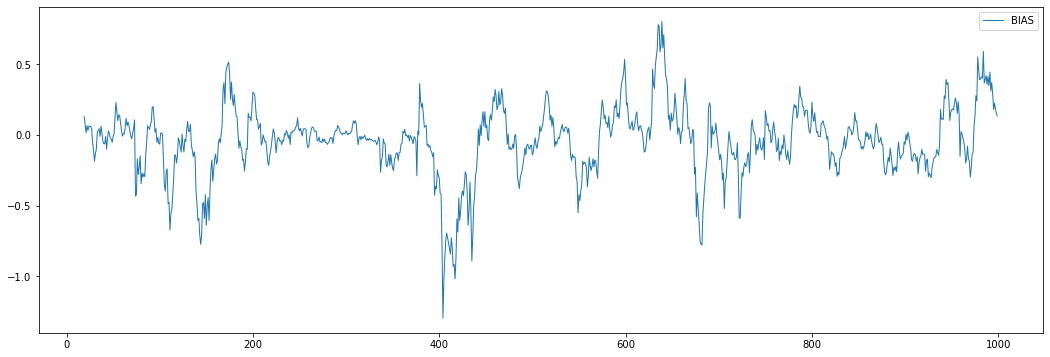

In [2]:
%%cython -IC:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include -c=-DNPY_NO_DEPRECATED_API="NPY_1_7_API_VERSION" --verbose
#cython: language_level=3str

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 6)
from ta_formula cimport _indicators as ta
from test_data import test_data

bias = ta.BIAS(test_data['close'], 20)
print('vector:', bias[-3:])
cdef double sbias = ta.stream_BIAS(test_data['close'], 20)
print('stream:', sbias)
rbias = ta.recent_BIAS(test_data['close'], 20, 3)
print('recent:', rbias)

plt.plot(bias, label="BIAS", linewidth=1)
plt.legend(loc="best")

### MACD

vector: [14.78609958 14.20392231 13.58593246] [14.81383313 14.69185097 14.47066726] [-0.0554671  -0.97585731 -1.7694696 ]
stream: 13.585613546212699 14.470194405515944 -1.7691617186064903
recent: [14.78611383 14.20393551 13.58594468] [14.81385249 14.69186909 14.47068421] [-0.05547732 -0.97586717 -1.76947906]


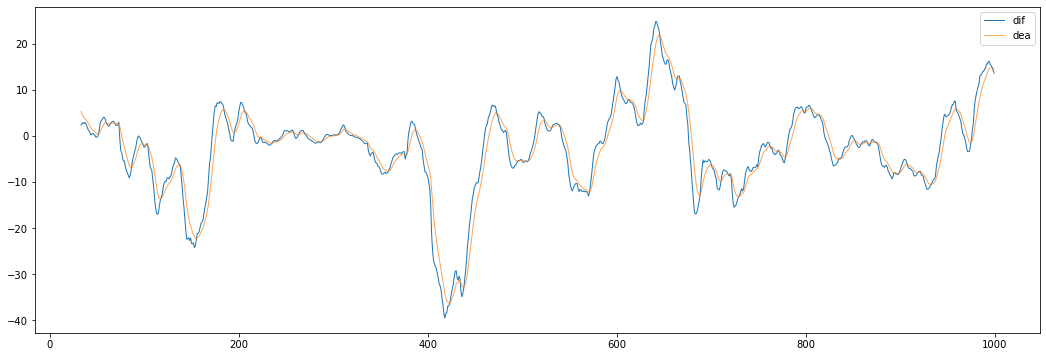

In [3]:
%%cython -IC:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include -c=-DNPY_NO_DEPRECATED_API="NPY_1_7_API_VERSION" --verbose
#cython: language_level=3str

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 6)
from ta_formula cimport _indicators as ta
from test_data import test_data

dif, dea, hist = ta.MACD(test_data['close'], 12, 26, 9)
print('vector:', dif[-3:], dea[-3:], hist[-3:])
cdef ta.tuple_double3 macd = ta.stream_MACD(test_data['close'], 12, 26, 9)
sdif, sdea, shist = macd
print('stream:', sdif, sdea, shist)
rdif, rdea, rhist = ta.recent_MACD(test_data['close'], 12, 26, 9, 3)
print('recent:', rdif, rdea, rhist)

plt.plot(dif, label="dif", linewidth=1)
plt.plot(dea, label="dea", linewidth=1, alpha=0.7)
plt.legend(loc="best")

### KD

vector: [67.704544   63.65488118 57.58810261] [70.76549187 68.39528831 64.79289308]
stream: 57.58810260608417 64.79291116270358
recent: [67.704544   63.65488118 57.58810261] [70.76549573 68.39529088 64.79289479]


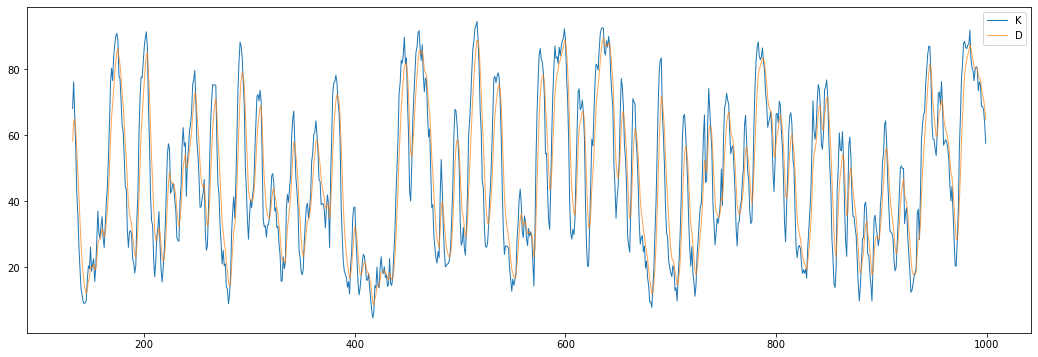

In [4]:
%%cython -IC:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include -c=-DNPY_NO_DEPRECATED_API="NPY_1_7_API_VERSION" --verbose
#cython: language_level=3str

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 6)
from ta_formula cimport _indicators as ta
from test_data import test_data

k, d = ta.KD(test_data['high'], test_data['low'], test_data['close'], 9, 3, 3)
print('vector:', k[-3:], d[-3:])
cdef ta.tuple_double2 kd = ta.stream_KD(test_data['high'], test_data['low'], test_data['close'], 9, 3, 3)
sk, sd = kd
print('stream:', sk, sd)
rk, rd = ta.recent_KD(test_data['high'], test_data['low'], test_data['close'], 9, 3, 3, 3)
print('recent:', rk, rd)

plt.plot(k, label="K", linewidth=1)
plt.plot(d, label="D", linewidth=1, alpha=0.7)
plt.legend(loc="best")

### KDJ

vector: [67.704544   63.65488118 57.58810261] [70.76549187 68.39528831 64.79289308] [61.58264824 54.17406693 43.17852167]
stream: 57.58810260608417 64.79291116270358 43.17848549284537
recent: [67.704544   63.65488118 57.58810261] [70.76549573 68.39529088 64.79289479] [61.58264053 54.17406179 43.17851824]


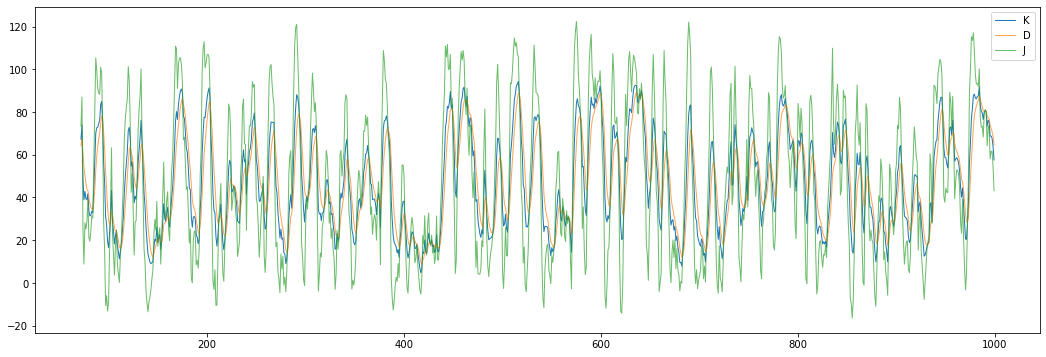

In [5]:
%%cython -IC:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include -c=-DNPY_NO_DEPRECATED_API="NPY_1_7_API_VERSION" --verbose
#cython: language_level=3str

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 6)
from ta_formula cimport _indicators as ta
from test_data import test_data

k, d, j = ta.KDJ(test_data['high'], test_data['low'], test_data['close'], 9, 3, 3)
print('vector:', k[-3:], d[-3:], j[-3:])
cdef ta.tuple_double3 kdj = ta.stream_KDJ(test_data['high'], test_data['low'], test_data['close'], 9, 3, 3)
sk, sd, sj = kdj
print('stream:', sk, sd, sj)
rk, rd, rj = ta.recent_KDJ(test_data['high'], test_data['low'], test_data['close'], 9, 3, 3, 3)
print('recent:', rk, rd, rj)

plt.plot(k, label="K", linewidth=1)
plt.plot(d, label="D", linewidth=1, alpha=0.7)
plt.plot(j, label="J", linewidth=1, alpha=0.7)
plt.legend(loc="best")

### SLOW_KD

vector: 15.059984640538595 12.902647213651875
stream: 89.97947536213022 90.12987900350545
recent: 15.059984640538595 12.902647213651889


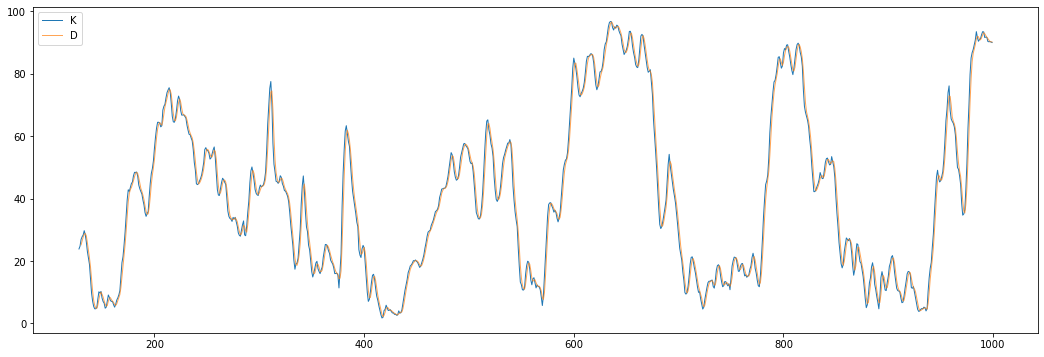

In [6]:
%%cython -IC:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include -c=-DNPY_NO_DEPRECATED_API="NPY_1_7_API_VERSION" --verbose
#cython: language_level=3str

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 6)
from ta_formula cimport _indicators as ta
from test_data import test_data

k, d = ta.SLOW_KD(test_data['high'], test_data['low'], test_data['close'], 69, 3)
print('vector:', k[-100], d[-100])
cdef ta.tuple_double2 skd = ta.stream_SLOW_KD(test_data['high'], test_data['low'], test_data['close'], 69, 3)
ssk, ssd = skd
print('stream:', ssk, ssd)
rsk, rsd = ta.recent_SLOW_KD(test_data['high'], test_data['low'], test_data['close'], 69, 3, 100)
print('recent:', rsk[0], rsd[0])

plt.plot(k, label="K", linewidth=1)
plt.plot(d, label="D", linewidth=1, alpha=0.7)
plt.legend(loc="best")

### AMPLITUDE

vector: [0.00075538 0.00125707 0.00125818 0.00062838 0.        ]
stream: 0.0
recent: [0.00075538 0.00125707 0.00125818 0.00062838 0.        ]


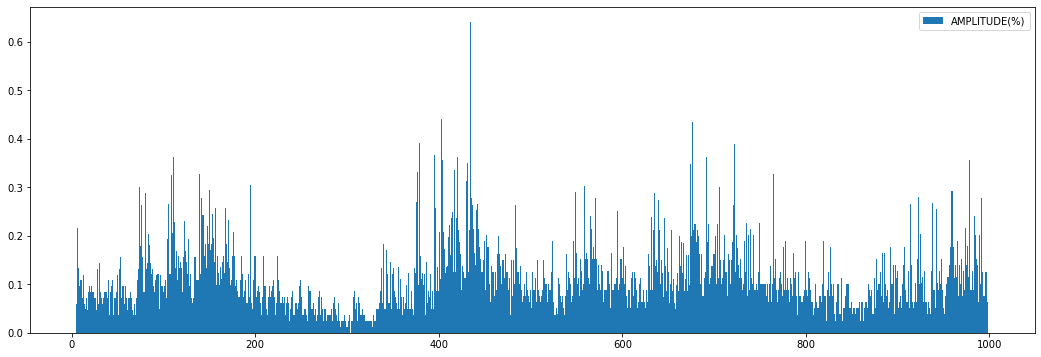

In [7]:
%%cython -IC:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include -c=-DNPY_NO_DEPRECATED_API="NPY_1_7_API_VERSION" --verbose
#cython: language_level=3str

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 6)
from ta_formula cimport _indicators as ta
from test_data import test_data

amp = ta.AMPLITUDE(test_data['high'], test_data['low'], test_data['close'], 5)
print('vector:', amp[-5:])
cdef double samp = ta.stream_AMPLITUDE(test_data['high'], test_data['low'], test_data['close'], 5)
print('stream:', samp)
ramp = ta.recent_AMPLITUDE(test_data['high'], test_data['low'], test_data['close'], 5, 5)
print('recent:', ramp)

# print(amp)
plt.bar(range(len(amp)), amp*100, width=1.0, label="AMPLITUDE(%)")
plt.legend(loc="best")

vector: 7952.0


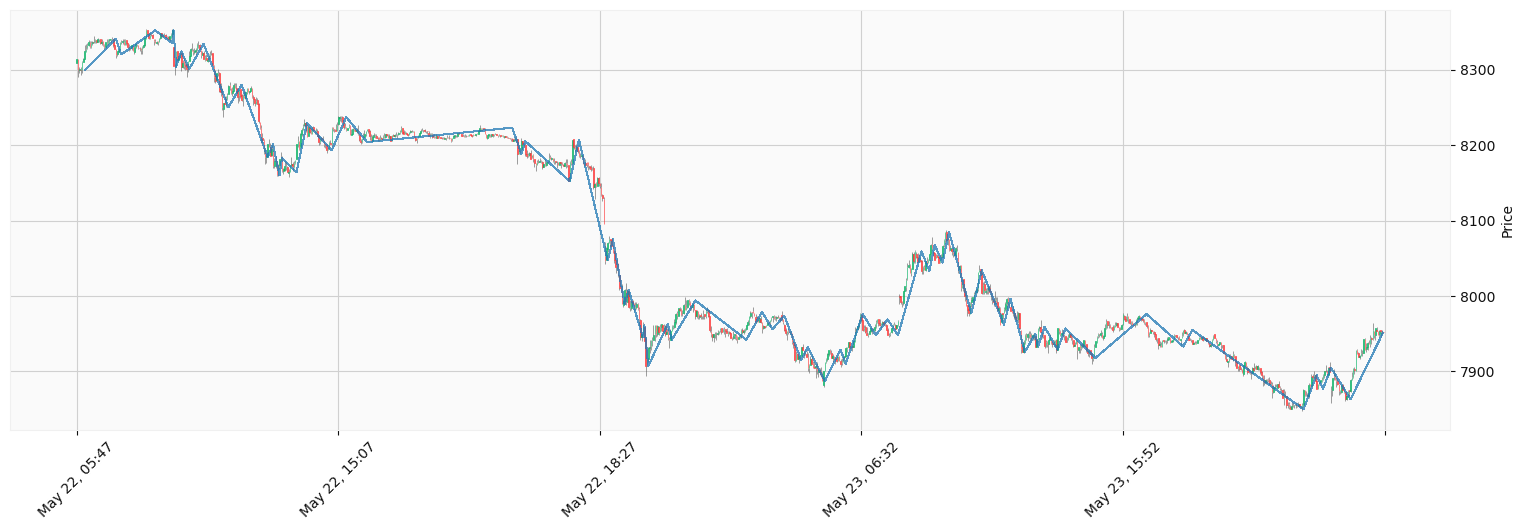

In [8]:
%%cython -IC:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include -c=-DNPY_NO_DEPRECATED_API="NPY_1_7_API_VERSION" --verbose
#cython: language_level=3str

from ta_formula cimport _indicators as ta
from test_data import test_data
import mplfinance as mpf
import pandas as pd
import numpy as np

points = ta.ZIG(test_data['close'], 0.002)
print('vector:', points[-1])

df = pd.DataFrame(test_data)
df['dt'] = pd.to_datetime(df['dt'], unit='s')
df = df.set_index("dt")

mask = np.isfinite(points)
points = points[mask]
xs = df.index[mask]

ic = [ ]

mpf.plot(df, volume=False, addplot=ic, style='yahoo', type='candle', figsize=(20,6), warn_too_much_data=1000, alines=dict(alines=list(zip(xs, points)),linewidths=0.75,alpha=0.75))

## 区间指标

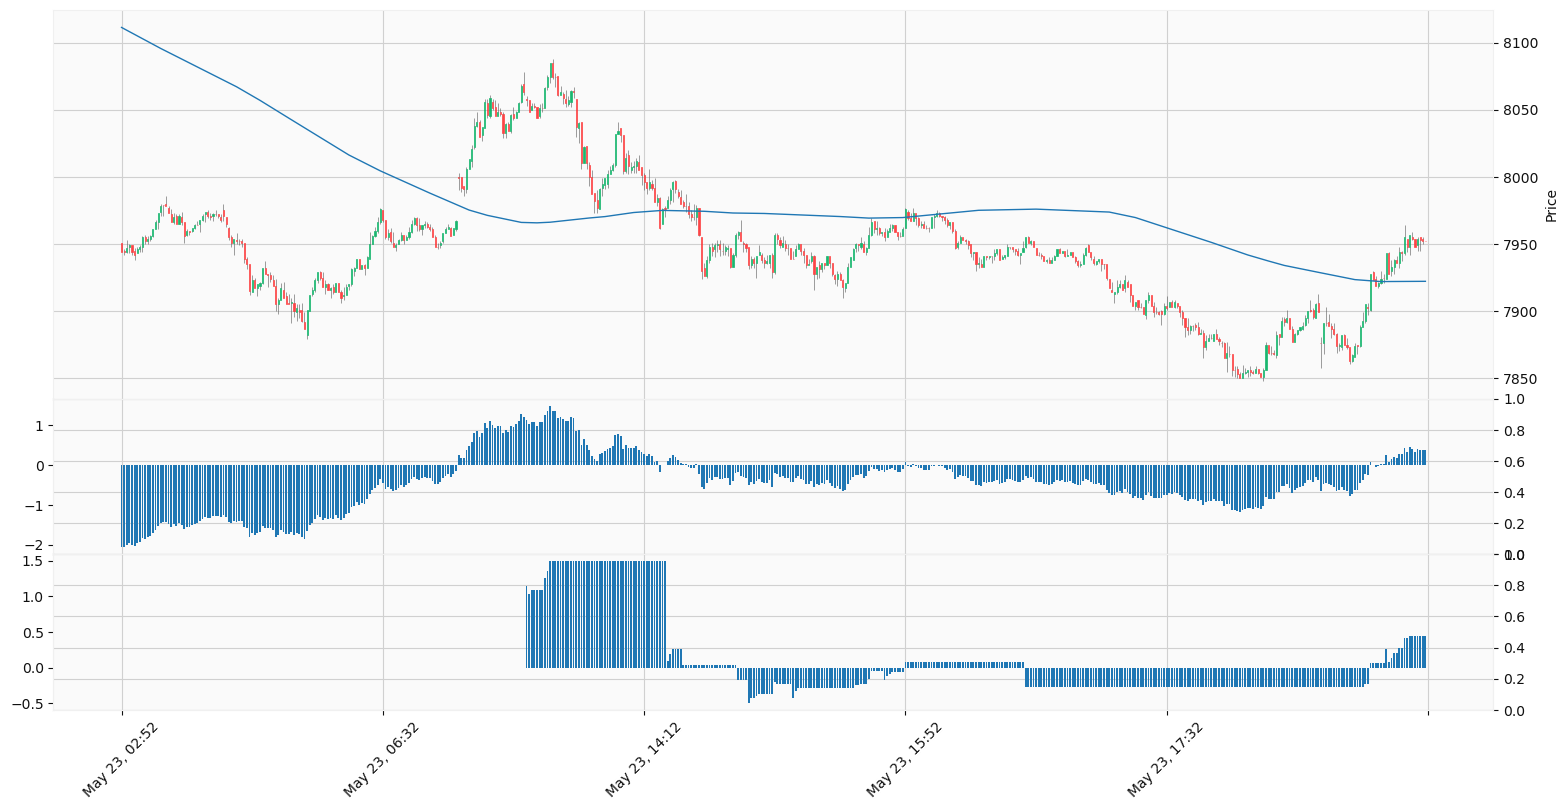

In [9]:
%%cython -IC:/ProgramData/Anaconda3/lib/site-packages/numpy/core/include -c=-DNPY_NO_DEPRECATED_API="NPY_1_7_API_VERSION" --verbose
# %%cython -I/Users/qiong/opt/miniconda3/lib/python3.9/site-packages/numpy/core/include -c=-DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION --verbose

from ta_formula cimport _indicators as ta
from test_data import test_data
import mplfinance as mpf
import pandas as pd

period_max_bias = ta.PERIOD_MAX_BIAS(test_data['close'], 250, 0)
ma250 = ta.SMA(test_data['close'], 250)
bias = ta.BIAS(test_data['close'], 250)
ic = [
    mpf.make_addplot(ma250[500:], width=1),
    mpf.make_addplot(bias[500:], type='bar', width=0.7, panel=1, secondary_y=True),
    mpf.make_addplot(period_max_bias[500:], type='bar', width=0.7, panel=2, secondary_y=True),
]

df = pd.DataFrame(test_data)
df['dt'] = pd.to_datetime(df['dt'], unit='s')
df = df.set_index("dt")
mpf.plot(df.tail(500), volume=False, addplot=ic, style='yahoo', type='candle', figsize=(20,10))

## 策略

In [1]:
from ta_formula.strategy import Strategy
strategy = Strategy('test_strategy.pyx', {}, ["open", "close", "last_close_price", "last_ma250"])
print(f'{strategy!r}')


# THIS IS AUTO GENERATED FILE, DO NOT MODIFY THIS FILE

#cython: language_level=3str
cimport ta_formula._indicators as ta


def calculate(CLOSE, HIGH, LOW):
    
    cdef int _ma5_defined = 0
    _ma5 = None
    def ma5():
        nonlocal _ma5_defined, _ma5
        if _ma5_defined == 0:
            _ma5 = ta.SMA(CLOSE, 5)
            _ma5_defined = 1
        return _ma5

    cdef int _ma250_defined = 0
    _ma250 = None
    def ma250():
        nonlocal _ma250_defined, _ma250
        if _ma250_defined == 0:
            _ma250 = ta.SMA(CLOSE, 250)
            _ma250_defined = 1
        return _ma250

    cdef int _skd_defined = 0
    _skd = None
    def skd():
        nonlocal _skd_defined, _skd
        if _skd_defined == 0:
            _skd = ta.stream_SLOW_KD(HIGH, LOW, CLOSE, 69, 3)
            _skd_defined = 1
        return _skd


    return {
        'open_long_condition1': ta.kup(ma250(), -1) and ta.crossdown(ma5(), ma250(), -1), 
        'open_short_condition1': ta.kdown(ma250

In [3]:
from test_data import test_data
strategy.feed_datas([[test_data]])
strategy.calculate()

{'open_long_condition1': False,
 'open_short_condition1': False,
 'open_long_condition2': False,
 'open_short_condition2': False,
 'close_long': False,
 'close_short': False,
 'last_close_price': 7952.0,
 'last_ma250': 7922.2}

In [3]:
%timeit strategy.calculate()

13.9 µs ± 684 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## 数据流入-信号流出框架

### 多线程版本

In [1]:
import logging
import threading
import time

from ta_formula.dataflow import open_signal_stream
from ta_formula.datasource import DataBackend, add_backend, close_all_backends

logging.basicConfig(level='DEBUG')

class MyDataBackend(DataBackend):

    def __init__(self, bid, config) -> None:
        super().__init__(bid, config)
        # connect to ip:port here
        # ... 

    def prepare(self, symbols: list, intervals: list):
        # 直接用本地数据测试
        from test_data import test_data
        for symbol in symbols:
            for interval in intervals:
                self.add_data(symbol, interval, test_data)

        # 模拟数据刷新线程...
        self.quit = False
        self.t = threading.Thread(target=self.stream_downloader)
        self.t.start()

    def stream_downloader(self):
        while not self.quit:
            time.sleep(0.1)
            self.on_update('ag2412', '5m')
            time.sleep(0.1)
            self.on_update('al2408', '5m')

    def close(self):
        self.quit = True
        self.t.join()

# 2种添加数据后台的方法，任选其一即可：
add_backend("MyDataBackend", "shanghai001", {"ip": "192.168.2.100", "port": 9999})
add_backend(MyDataBackend("shanghai001", {"ip": "192.168.2.100", "port": 9999}))

# 订阅参数
request = {
    # 数据源引用了上诉编号为shanghai001的MyDataBackend后台，策略同时订阅两个标的物的信号
    "datasources": [["shanghai001.ag2412"], ["shanghai001.al2408"]],
    "pyx_file": "test_strategy.pyx",
    "params": {},
    "return_fields": ["open", "close", "last_close_price"],
    "datas": [["5m"]], # 将策略默认K线从1m 改成5m
}

t = 0
# 开始将数据流转化成信号流
for signal in open_signal_stream(request):
    print(signal)
    # 方便测试，这里只输出10条就退出
    t += 1
    if t > 10:
        break

close_all_backends()

DEBUG:root:MyDataBackend(shanghai001, {'ip': '192.168.2.100', 'port': 9999}) Added
DEBUG:root:_CalculateUnit(test_strategy.pyx_5827211815226836193, [(MyDataBackend(shanghai001), 'ag2412', ['5m'])], 213422392277479875): New. Ref count 1
DEBUG:root:_CalculateUnit(test_strategy.pyx_5827211815226836193, [(MyDataBackend(shanghai001), 'al2408', ['5m'])], -6455215420243334051): New. Ref count 1


{'open_long_condition1': False, 'open_short_condition1': False, 'open_long_condition2': False, 'open_short_condition2': False, 'close_long': False, 'close_short': False, 'last_close_price': 7952.0, 'calc_unit_id': 213422392277479875, 'data_rec_time': 1718170755.099007, 'calc_time': 603300, 'symbols': [('shanghai001', 'ag2412')]}
{'open_long_condition1': False, 'open_short_condition1': False, 'open_long_condition2': False, 'open_short_condition2': False, 'close_long': False, 'close_short': False, 'last_close_price': 7952.0, 'calc_unit_id': -6455215420243334051, 'data_rec_time': 1718170755.2070036, 'calc_time': 234800, 'symbols': [('shanghai001', 'al2408')]}
{'open_long_condition1': False, 'open_short_condition1': False, 'open_long_condition2': False, 'open_short_condition2': False, 'close_long': False, 'close_short': False, 'last_close_price': 7952.0, 'calc_unit_id': 213422392277479875, 'data_rec_time': 1718170755.3160837, 'calc_time': 279300, 'symbols': [('shanghai001', 'ag2412')]}
{'o

DEBUG:root:_CalculateUnit(test_strategy.pyx_5827211815226836193, [(MyDataBackend(shanghai001), 'ag2412', ['5m'])], 213422392277479875): Delete. Ref count 0
DEBUG:root:_CalculateUnit(test_strategy.pyx_5827211815226836193, [(MyDataBackend(shanghai001), 'al2408', ['5m'])], -6455215420243334051): Delete. Ref count 0
DEBUG:root:MyDataBackend(shanghai001) Shutdown


{'open_long_condition1': False, 'open_short_condition1': False, 'open_long_condition2': False, 'open_short_condition2': False, 'close_long': False, 'close_short': False, 'last_close_price': 7952.0, 'calc_unit_id': 213422392277479875, 'data_rec_time': 1718170756.181526, 'calc_time': 942700, 'symbols': [('shanghai001', 'ag2412')]}


### Asyncio版本

In [2]:
import asyncio
import logging

from ta_formula.dataflow_aio import open_signal_stream
from ta_formula.datasource import AioDataBackend, add_backend, close_all_backends_async

logging.basicConfig(level='DEBUG')

class MyAioDataBackend(AioDataBackend):

    def __init__(self, bid, config) -> None:
        super().__init__(bid, config)
        # connect to ip:port here
        # ... 

    async def prepare(self, symbols: list, intervals: list):
        # 直接用本地数据测试
        from test_data import test_data
        for symbol in symbols:
            for interval in intervals:
                self.add_data(symbol, interval, test_data)

        # 模拟数据刷新...
        self.quit = False
        self.t = asyncio.create_task(self.stream_downloader())

    async def stream_downloader(self):
        while not self.quit:
            await asyncio.sleep(1)
            self.on_update('ag2412', '5m')
            self.on_update('al2408', '5m')

    async def close(self):
        self.quit = True
        await self.t

add_backend("MyAioDataBackend", "shanghai002", {"ip": "192.168.2.100", "port": 9999})


async def main():
    # 订阅参数
    request = {
        "datasources": [["shanghai002.ag2412"], ["shanghai002.al2408"]],
        "pyx_file": "test_strategy.pyx",
        "params": {},
        "return_fields": ["open", "close", "last_close_price"],
        "datas": [["5m"]], # 将策略默认K线从1m 改成5m
    }

    t = 0
    # 开始将数据流转化成信号流
    async for signal in open_signal_stream(request):
        print(signal)
        # 方便测试，这里只输出10条就退出
        t += 1
        if t > 10:
            break

    await close_all_backends_async()

loop = asyncio.get_event_loop()
# loop.run_until_complete(main())
await main()

DEBUG:root:MyAioDataBackend(shanghai002, {'ip': '192.168.2.100', 'port': 9999}) Added
DEBUG:root:_CalculateUnit(test_strategy.pyx_5827211815226836193, [(MyAioDataBackend(shanghai002), 'ag2412', ['5m'])], 391337184356955455): New. Ref count 1
DEBUG:root:_CalculateUnit(test_strategy.pyx_5827211815226836193, [(MyAioDataBackend(shanghai002), 'al2408', ['5m'])], -332117507601350391): New. Ref count 1


{'open_long_condition1': False, 'open_short_condition1': False, 'open_long_condition2': False, 'open_short_condition2': False, 'close_long': False, 'close_short': False, 'last_close_price': 7952.0, 'calc_unit_id': 391337184356955455, 'data_rec_time': 1718170776.3081007, 'calc_time': 356100, 'symbols': [('shanghai002', 'ag2412')]}
{'open_long_condition1': False, 'open_short_condition1': False, 'open_long_condition2': False, 'open_short_condition2': False, 'close_long': False, 'close_short': False, 'last_close_price': 7952.0, 'calc_unit_id': -332117507601350391, 'data_rec_time': 1718170776.3081007, 'calc_time': 537700, 'symbols': [('shanghai002', 'al2408')]}
{'open_long_condition1': False, 'open_short_condition1': False, 'open_long_condition2': False, 'open_short_condition2': False, 'close_long': False, 'close_short': False, 'last_close_price': 7952.0, 'calc_unit_id': 391337184356955455, 'data_rec_time': 1718170777.3129332, 'calc_time': 652300, 'symbols': [('shanghai002', 'ag2412')]}
{'o

DEBUG:root:MyAioDataBackend(shanghai002) Shutdown
DEBUG:root:_CalculateUnit(test_strategy.pyx_5827211815226836193, [(MyAioDataBackend(shanghai002), 'ag2412', ['5m'])], 391337184356955455): Delete. Ref count 0
DEBUG:root:_CalculateUnit(test_strategy.pyx_5827211815226836193, [(MyAioDataBackend(shanghai002), 'al2408', ['5m'])], -332117507601350391): Delete. Ref count 0


{'open_long_condition1': False, 'open_short_condition1': False, 'open_long_condition2': False, 'open_short_condition2': False, 'close_long': False, 'close_short': False, 'last_close_price': 7952.0, 'calc_unit_id': 391337184356955455, 'data_rec_time': 1718170781.3432739, 'calc_time': 173400, 'symbols': [('shanghai002', 'ag2412')]}
